In [2]:
import pandas as pd

import numpy as np
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_json("train.jsonl", lines=True)
df

,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]"
...,...,...,...,...,...
145444,75062,VERIFIABLE,REFUTES,Led Zeppelin released an eponymous debut album...,"[[[91851, 104659, Led_Zeppelin, 6], [91851, 10..."
145445,149256,VERIFIABLE,SUPPORTS,Taal was romantic.,"[[[292586, 285327, Taal_-LRB-film-RRB-, 0]], [..."
145446,13287,VERIFIABLE,SUPPORTS,Her stars American actress Rooney Mara.,"[[[28520, 34848, Her_-LRB-film-RRB-, 3], [2852..."
145447,13114,VERIFIABLE,SUPPORTS,J. R. R. Tolkien created Gimli.,"[[[28359, 34669, Gimli_-LRB-Middle-earth-RRB-,..."


In [4]:
df.evidence[0]

[[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
  [92206, 104971, 'Fox_Broadcasting_Company', 0]]]

In [217]:
q = df.claim.tolist()
vect = CountVectorizer()
vec = vect.fit_transform(q)

In [218]:
len(vect.vocabulary_.keys())

21483

In [219]:
def removeList(a):
    return a[0]

In [220]:
a = Counter()
for row in df.iterrows():
    if(row[1].to_list()[2] != "NOT ENOUGH INFO"):
        b = len(row[1].to_list()[4])
        a[b] += 1
print(a.most_common())

[(1, 78838), (2, 13268), (3, 4456), (5, 3229), (4, 3120), (6, 1964), (7, 1086), (8, 741), (9, 543), (10, 451), (11, 332), (12, 289), (13, 233), (14, 182), (16, 111), (15, 110), (18, 97), (17, 94), (19, 77), (21, 70), (20, 69), (22, 46), (24, 39), (26, 38), (25, 34), (23, 28), (29, 24), (27, 23), (30, 18), (31, 15), (36, 12), (33, 12), (34, 11), (28, 11), (32, 10), (44, 9), (39, 9), (37, 8), (52, 8), (42, 7), (35, 7), (38, 6), (43, 5), (45, 5), (50, 4), (40, 4), (53, 4), (47, 4), (62, 3), (56, 3), (54, 3), (48, 3), (49, 3), (46, 2), (59, 2), (51, 2), (60, 2), (66, 2), (65, 2), (78, 2), (41, 2), (138, 1), (61, 1), (71, 1), (58, 1), (140, 1), (122, 1), (63, 1), (102, 1), (156, 1), (130, 1), (55, 1), (84, 1), (85, 1), (67, 1), (96, 1), (75, 1), (117, 1), (251, 1)]


In [221]:
l = list(zip(*(sorted(a.items()))))

k, v = list(l[0]), list(l[1])

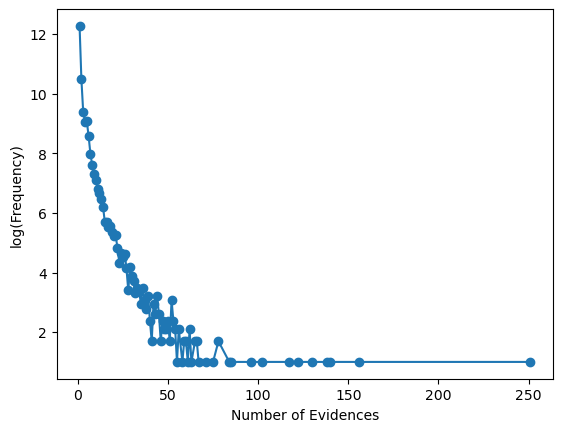

In [244]:
ax = plt.subplot()
ax.set_ylabel("log(Frequency)")
ax.set_xlabel("Number of Evidences")
ax = plt.plot(k, np.log(v) + 1, "-o")
plt.show()

In [223]:
s = df.label.value_counts()
x, y = s.to_list(), s.index.to_list()
print(x)
print(y)

[80035, 35639, 29775]
['SUPPORTS', 'NOT ENOUGH INFO', 'REFUTES']


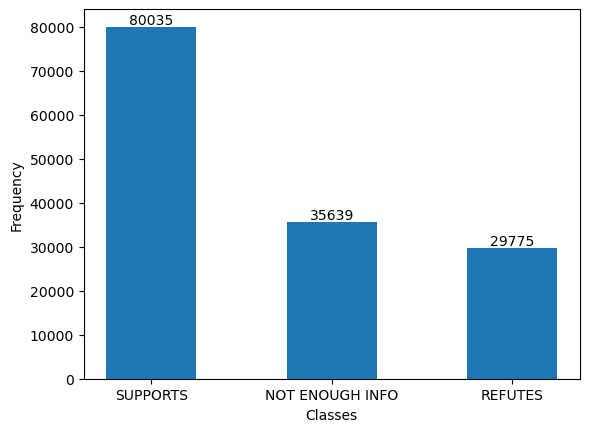

In [224]:
ax = plt.subplot()
ax.set_ylabel("Frequency")
ax.set_xlabel("Classes")
ax = plt.bar(y, x, width=0.5)

for rect in ax:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.show()

In [225]:
sup = df[df.label == "SUPPORTS"]
ref = df[df.label == "REFUTES"]
nei = df[df.label == "NOT ENOUGH INFO"]
nei.shape

(35639, 5)

In [226]:
data = []
cs = Counter()
csl = Counter()
for row in sup.iterrows():
    line = row[1].to_list()[3]
    words = re.findall(r"[\w']+", line)
    words = set(list(map(lambda x: x.lower(), words)))
    csl[len(words)] += 1
    cs.update(Counter(words))

In [227]:
s = cs["not"]
print(csl)

Counter({6: 12632, 7: 12356, 8: 11075, 5: 10512, 9: 8576, 10: 6409, 11: 4521, 4: 4128, 12: 3115, 13: 1983, 14: 1265, 3: 1171, 15: 781, 16: 473, 17: 287, 18: 212, 19: 107, 20: 96, 21: 71, 22: 32, 23: 31, 2: 29, 24: 28, 32: 20, 25: 16, 28: 16, 55: 14, 26: 13, 27: 12, 31: 12, 51: 11, 40: 10, 29: 8, 47: 4, 43: 4, 33: 3, 30: 1, 36: 1})


In [228]:
cr = Counter()
crl = Counter()
for row in ref.iterrows():
    line = row[1].to_list()[3]
    words = re.findall(r"[\w']+", line)
    words = set(list(map(lambda x: x.lower(), words)))
    crl[len(words)] += 1
    cr.update(Counter(words))

In [229]:
r = cr["not"]
print(crl)

Counter({6: 4865, 7: 4825, 8: 4780, 9: 3674, 5: 2972, 10: 2509, 11: 1870, 12: 1213, 4: 1186, 13: 732, 14: 439, 15: 258, 16: 151, 3: 134, 17: 83, 18: 29, 19: 20, 20: 14, 22: 8, 21: 5, 24: 2, 23: 2, 25: 2, 27: 1, 32: 1})


In [230]:
cn = Counter()
cnl = Counter()
for row in nei.iterrows():
    line = row[1].to_list()[3]
    words = re.findall(r"[\w']+", line)
    words = set(list(map(lambda x: x.lower(), words)))
    cnl[len(words)] += 1
    cn.update(Counter(words))

In [237]:
n = cn["not"]
print(cnl)

Counter({6: 5743, 7: 5532, 5: 4971, 8: 4838, 9: 3869, 10: 2914, 11: 2109, 4: 1597, 12: 1413, 13: 890, 14: 578, 15: 352, 3: 257, 16: 225, 17: 114, 18: 89, 19: 44, 20: 42, 21: 19, 22: 9, 23: 8, 24: 8, 25: 5, 26: 3, 2: 2, 29: 2, 28: 2, 27: 1, 33: 1, 31: 1, 32: 1})


In [238]:
h = [s, n, r]

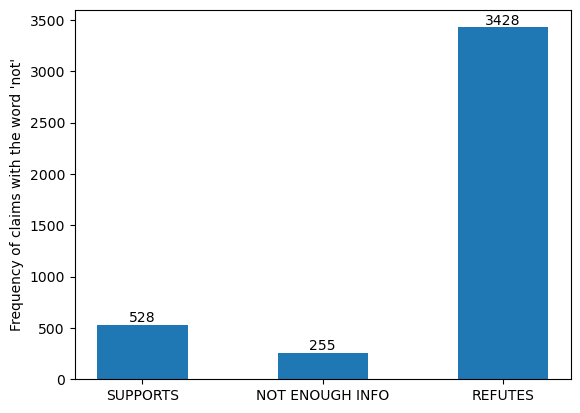

In [239]:
plt.ylabel("Frequency of claims with the word 'not'")
ax = plt.bar(y, h, width=0.5)

for rect in ax:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.show()

In [234]:
a = Counter()
for row in sup.iterrows():
    b = len(row[1].to_list()[4])
    a[b] += 1
print(a.most_common())

[(1, 57417), (2, 9698), (3, 3160), (5, 2481), (4, 2266), (6, 1490), (7, 785), (8, 544), (9, 390), (10, 322), (11, 242), (12, 204), (13, 154), (14, 121), (16, 76), (15, 74), (18, 67), (17, 67), (19, 55), (20, 44), (21, 43), (24, 33), (22, 31), (26, 30), (25, 25), (27, 18), (29, 17), (23, 17), (30, 16), (31, 11), (32, 10), (33, 10), (34, 9), (28, 9), (36, 8), (42, 7), (44, 6), (37, 6), (38, 6), (35, 6), (39, 5), (52, 4), (40, 4), (45, 4), (50, 3), (43, 3), (48, 3), (47, 3), (62, 2), (51, 2), (53, 2), (49, 2), (66, 2), (138, 1), (59, 1), (58, 1), (140, 1), (122, 1), (63, 1), (102, 1), (156, 1), (65, 1), (130, 1), (54, 1), (84, 1), (85, 1), (78, 1), (46, 1), (67, 1), (96, 1), (60, 1), (117, 1), (251, 1), (41, 1)]


In [235]:
a = Counter()
for row in ref.iterrows():
    b = len(row[1].to_list()[4])
    a[b] += 1
print(a.most_common())

[(1, 21421), (2, 3570), (3, 1296), (4, 854), (5, 748), (6, 474), (7, 301), (8, 197), (9, 153), (10, 129), (11, 90), (12, 85), (13, 79), (14, 61), (15, 36), (16, 35), (18, 30), (21, 27), (17, 27), (20, 25), (19, 22), (22, 15), (23, 11), (25, 9), (26, 8), (29, 7), (24, 6), (27, 5), (52, 4), (31, 4), (36, 4), (39, 4), (56, 3), (44, 3), (43, 2), (54, 2), (30, 2), (33, 2), (37, 2), (53, 2), (28, 2), (34, 2), (46, 1), (61, 1), (71, 1), (60, 1), (65, 1), (55, 1), (78, 1), (49, 1), (59, 1), (41, 1), (62, 1), (35, 1), (45, 1), (47, 1), (75, 1), (50, 1)]


In [236]:
a = Counter()
for row in nei.iterrows():
    b = len(row[1].to_list()[4])
    a[b] += 1
print(a.most_common())

[(1, 35639)]


In [241]:
j = Counter()
j.update(cs)
j.update(cr)
j.update(cn)
print(len(j.most_common()))

22987
